In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
                            })

In [3]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [4]:
student_data.rename_axis('StudentID')

,Age,Tardies
StudentID,,
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

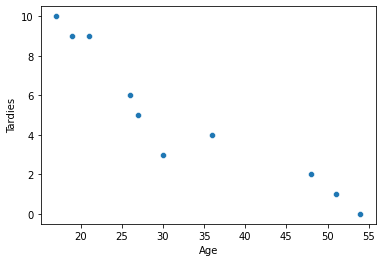

In [5]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

***The hypothesis that younger people are more often late than older people is true***

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.

In [7]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [8]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


***the covariance and the correlation shows that the relationship is inverse, the younger the age, the later they arrive.***

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.

In [10]:
results = smf.ols('Age ~ Tardies', data=student_data).fit()
results.summary()

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           5.57e-05
Time:                        18:20:53   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

In [11]:
# Your code here.

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(
    X=student_data.Age.to_frame(),
    y=student_data.Tardies
)

beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [14]:

beta_0, beta_1


(12.888803363135771, -0.2428207709159809)

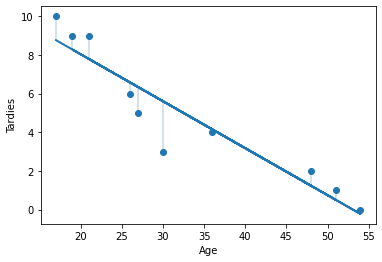

In [15]:
y=student_data.Tardies
X = student_data.Age.to_frame()
# regression line1
y_hat = beta_0 + beta_1 * X
# plot the linear fit on top of the scatter
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Tardies'>

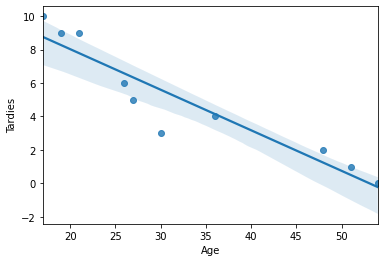

In [16]:
sns.regplot(X,y)

***We obtain the variables of beta 0 and beta 1 from our equation, we are using a linear regression***

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
# Your response here. 

Our R^2 or "coefficient of determination", is the percentage of the variation in the response variable that is explained by a linear model. 
In our model is 0.882 , 88% explains all the variability of the response data around its mean.
Note: The R-squared does not indicate whether a regression model is adequate.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data

In [19]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [20]:
# Your response here. 

First I will remove the columns that are not interesting for my dataset

In [21]:
vehicles = vehicles.drop(["Model","Engine Displacement","Transmission","Drivetrain","Vehicle Class","Fuel Type","City MPG","Highway MPG"], axis=1)


In [55]:
vehicles.columns = vehicles.columns.str.replace(" ", "_").str.replace("/", "_per_")

In [49]:
vehicles.head()

,Make,Year,Cylinders,Fuel_Barrels_per_Year,Combined_MPG,CO2_Emission_Grams_per_Mile,Fuel_Cost_per_Year
0,AM General,1984,4.0,19.388824,17,522.764706,1950
1,AM General,1984,6.0,25.354615,13,683.615385,2550
2,AM General,1985,4.0,20.600625,16,555.437500,2100
3,AM General,1985,6.0,25.354615,13,683.615385,2550
4,ASC Incorporated,1987,6.0,20.600625,16,555.437500,2550


<AxesSubplot:>

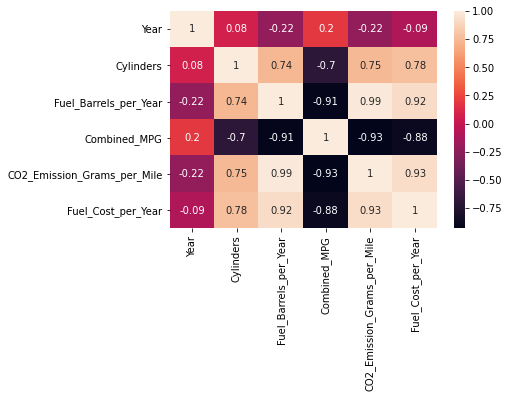

In [50]:
correlation_matrix = vehicles.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [51]:
vehicles.corr()

,Year,Cylinders,Fuel_Barrels_per_Year,Combined_MPG,CO2_Emission_Grams_per_Mile,Fuel_Cost_per_Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel_Barrels_per_Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2_Emission_Grams_per_Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel_Cost_per_Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


- There are a direct and highly dependent correlation with Fuel Barrels/year and Fuel Cost/year.
- There is a correlation but not so direct with the number of engine cylinders.
- CO2 Emission Grams/Mile has a very high inverse correlation with Combined MPG.



Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

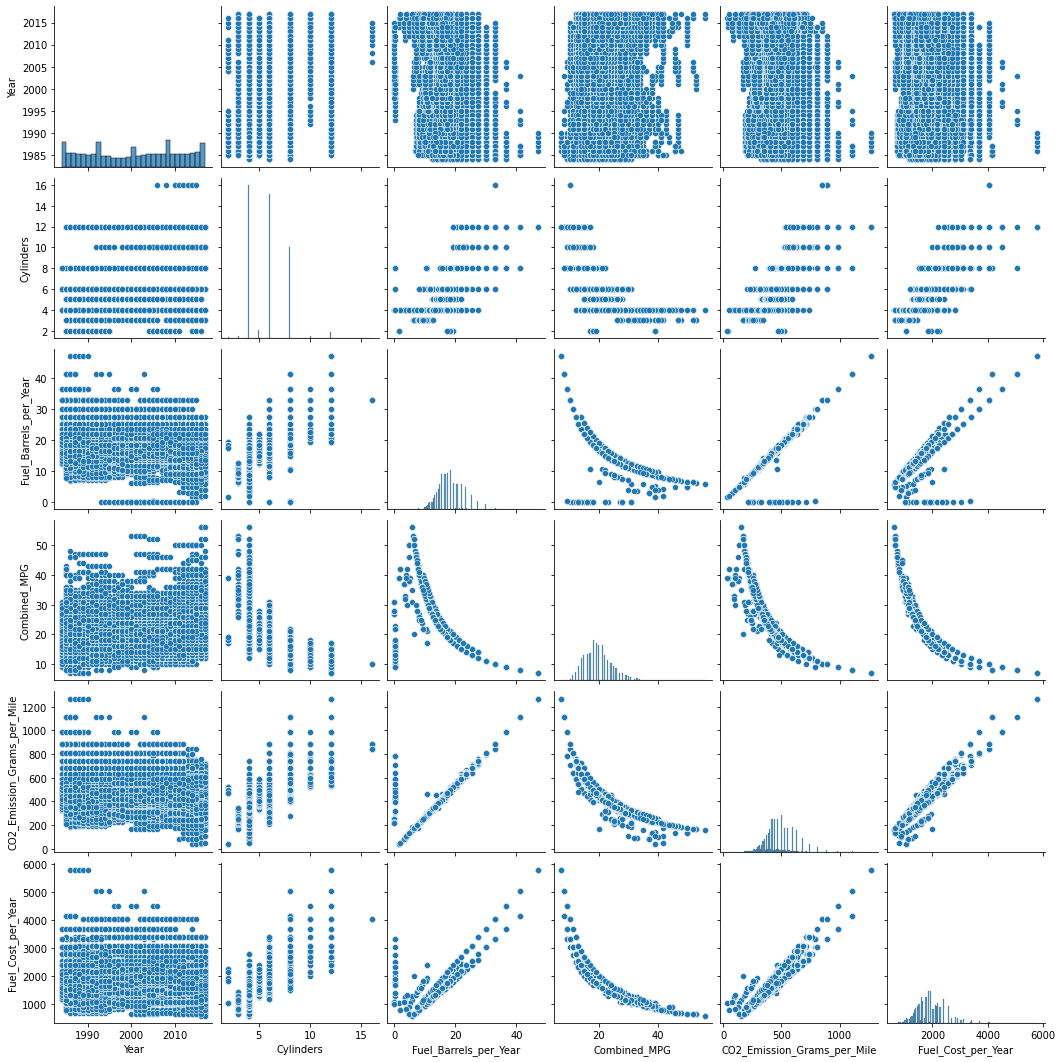

In [52]:
sns.pairplot(vehicles)

In [56]:
results1 = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year', data=vehicles).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.973
Model:                                     OLS   Adj. R-squared:                  0.973
Method:                          Least Squares   F-statistic:                 1.275e+06
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 18:48:30   Log-Likelihood:            -1.5821e+05
No. Observations:                        35952   AIC:                         3.164e+05
Df Residuals:                            35950   BIC:                         3.164e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_per_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
results2 = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Cost_per_Year', data=vehicles).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.867
Model:                                     OLS   Adj. R-squared:                  0.867
Method:                          Least Squares   F-statistic:                 2.334e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 18:51:18   Log-Likelihood:            -1.8665e+05
No. Observations:                        35952   AIC:                         3.733e+05
Df Residuals:                            35950   BIC:                         3.733e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             61.5631      0.887     69.430      0.000      59.825      63.301
Fuel_Cost_per_Year     0.2186      0.000    483.072      0.000       0.218       0.220
==============================================================================
Omnibus:                     1566.464   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.699
Skew:                          -0.399   Prob(JB):                    3.65e-288
Kurtosis:                       2.502   Cond. No.                     7.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
results3 = smf.ols('CO2_Emission_Grams_per_Mile ~ Combined_MPG', data=vehicles).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.858
Model:                                     OLS   Adj. R-squared:                  0.858
Method:                          Least Squares   F-statistic:                 2.170e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 18:52:17   Log-Likelihood:            -1.8778e+05
No. Observations:                        35952   AIC:                         3.756e+05
Df Residuals:                            35950   BIC:                         3.756e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      905.2031      0.953    950.221      0.000     903.336     907.070
Combined_MPG   -21.5706      0.046   -465.877      0.000     -21.661     -21.480
==============================================================================
Omnibus:                    23856.426   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380865.584
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      17.770   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
results4 = smf.ols('CO2_Emission_Grams_per_Mile ~ Cylinders', data=vehicles).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.566
Model:                                     OLS   Adj. R-squared:                  0.566
Method:                          Least Squares   F-statistic:                 4.690e+04
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 18:54:20   Log-Likelihood:            -2.0784e+05
No. Observations:                        35952   AIC:                         4.157e+05
Df Residuals:                            35950   BIC:                         4.157e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.0946      1.420    127.520      0.000     178.311     183.878
Cylinders     51.0352      0.236    216.569      0.000      50.573      51.497
==============================================================================
Omnibus:                     4434.518   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11452.248
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.382   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
results5 = smf.ols('CO2_Emission_Grams_per_Mile ~ Year', data=vehicles).fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.049
Model:                                     OLS   Adj. R-squared:                  0.049
Method:                          Least Squares   F-statistic:                     1869.
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 18:55:18   Log-Likelihood:            -2.2194e+05
No. Observations:                        35952   AIC:                         4.439e+05
Df Residuals:                            35950   BIC:                         4.439e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5725.8633    121.455     47.144      0.000    5487.807    5963.920
Year          -2.6243      0.061    -43.231      0.000      -2.743      -2.505
==============================================================================
Omnibus:                     3079.952   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4482.385
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.053   Cond. No.                     3.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
results5 = smf.ols('CO2_Emission_Grams_per_Mile ~ Year', data=vehicles).fit()
results5.summary()

In [65]:
results6 = smf.ols("CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year + Combined_MPG" ,
                   data=vehicles).fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.980
Model:                                     OLS   Adj. R-squared:                  0.980
Method:                          Least Squares   F-statistic:                 5.932e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 19:06:14   Log-Likelihood:            -1.5235e+05
No. Observations:                        35952   AIC:                         3.047e+05
Df Residuals:                            35948   BIC:                         3.047e+05
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel_Barrels_per_Year    19.6955      0.059    331.484      0.000      19.579      19.812
Fuel_Cost_per_Year        0.0317      0.000     70.466      0.000       0.031       0.033
Combined_MPG             -3.1661      0.043    -73.626      0.000      -3.250      -3.082
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
results7 = smf.ols("CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year + Combined_MPG + Cylinders + Year " ,
                   data=vehicles).fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.981
Model:                                     OLS   Adj. R-squared:                  0.981
Method:                          Least Squares   F-statistic:                 3.687e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 19:15:06   Log-Likelihood:            -1.5173e+05
No. Observations:                        35952   AIC:                         3.035e+05
Df Residuals:                            35946   BIC:                         3.035e+05
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               769.8883     19.392     39.702      0.000     731.880     807.897
Fuel_Barrels_per_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Fuel_Cost_per_Year        0.0323      0.000     67.025      0.000       0.031       0.033
Combined_MPG             -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Cylinders                 1.8788      0.083     22.598      0.000       1.716       2.042
Year                     -0.3206      0.010    -33.060      0.000      -0.340      -0.302
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

The variable more important is Fuel_Barrels_per_Year, the less important is the year.
If we add the column cylinders in our model the R Squared don't increase more than 98%,
but if we add the year we can increase the reliability's R squared at 98.1%.

In [68]:
lr = LinearRegression()

In [ ]:
y_hat = beta_0 + beta_1 * X
# plot the linear fit on top of the scatter
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2_Emission_Grams_per_Mile', ylabel='Fuel_Barrels_per_Year'>

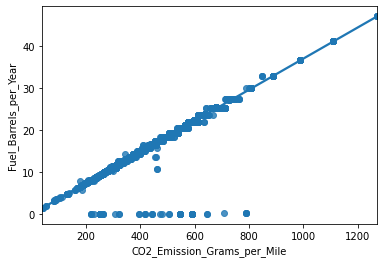

In [73]:
X = vehicles.CO2_Emission_Grams_per_Mile.to_frame()
y = vehicles.Fuel_Barrels_per_Year
sns.regplot(X,y)
#The point fuel = 0 is because in the database there are electric vehicles with 0 emissions.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [93]:
invitations = pd.DataFrame({'invite': [1, 3, 4, 6, 8, 9, 11, 14],
                         'attend': [1, 2, 4, 4, 5, 7, 8, 13],})
invitations

,invite,attend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='invite', ylabel='attend'>

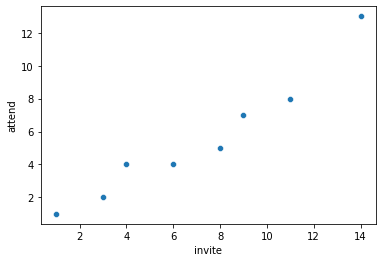

In [94]:
sns.scatterplot(x = invitations["invite"], y = invitations["attend"])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='invite', ylabel='attend'>

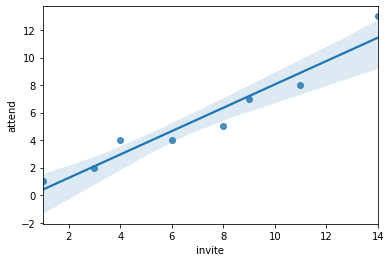

In [95]:
X = invitations.invite
y = invitations.attend
sns.regplot(X,y)

The hypothesis is not true, since the more people you invite, the more people come to the party.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='invite', ylabel='attend'>

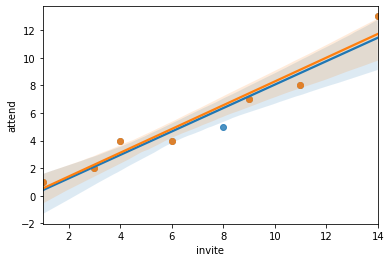

In [100]:
invitations2 = pd.DataFrame({'invite': [1, 3, 4, 6, 9, 11, 14],
                         'attend': [1, 2, 4, 4, 7, 8, 13],})
X = invitations2.invite
y = invitations2.attend
X1 = invitations.invite
y1 = invitations.attend
sns.regplot(X1,y1)
sns.regplot(X,y)


I remove the point (8,5), my regression is more accurate now.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [97]:
# Your response here. 